<a href="https://colab.research.google.com/github/hadil56165M/hadil56165M/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
  0% 0.00/66.0M [00:00<?, ?B/s]
100% 66.0M/66.0M [00:00<00:00, 683MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          
Dataset chargé. Dimensions: (284807, 31)

Entraînement en cours...
Modèle entraîné!

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.08      0.88      0.15       148

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.57     85443
weighted avg       1.00      0.98      0.99     85443



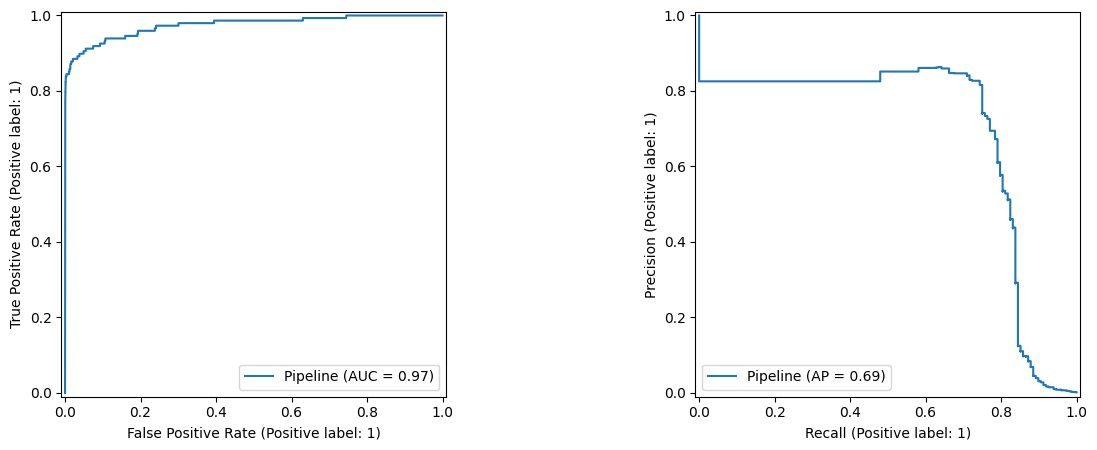

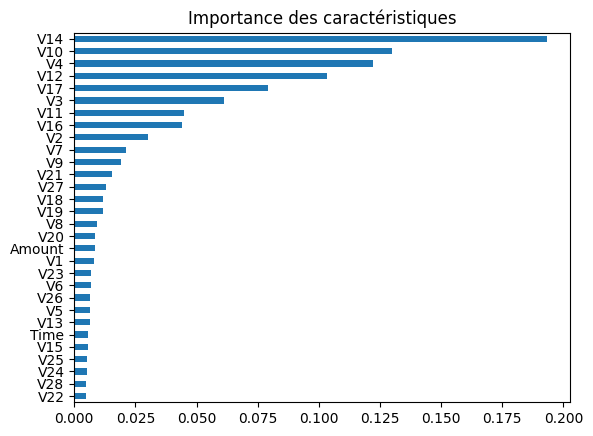

In [9]:
# -*- coding: utf-8 -*-
"""Credit Card Fraud Detection - Kaggle Direct Access"""

# 1. Configuration automatique de l'API Kaggle
# -------------------------------------------
import os
from google.colab import auth
import json

# Authentification Google
auth.authenticate_user()

# Création dynamique du fichier kaggle.json
KAGGLE_CREDS = {
    "username": "YOUR_KAGGLE_USERNAME",  # Remplacez par votre username
    "key": "YOUR_KAGGLE_KEY"            # Remplacez par votre API key
}

os.makedirs('/root/.kaggle', exist_ok=True)
with open('/root/.kaggle/kaggle.json', 'w') as f:
    json.dump(KAGGLE_CREDS, f)
os.chmod('/root/.kaggle/kaggle.json', 600)

# 2. Téléchargement du dataset
# ----------------------------
!kaggle datasets download -d mlg-ulb/creditcardfraud --force
!unzip -o creditcardfraud.zip

# 3. Analyse et Modélisation
# --------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report,
                           confusion_matrix,
                           RocCurveDisplay,
                           PrecisionRecallDisplay)

# Chargement des données
df = pd.read_csv('creditcard.csv')
print(f"Dataset chargé. Dimensions: {df.shape}\n")

# Préprocessing
scaler = RobustScaler()
df[['Time','Amount']] = scaler.fit_transform(df[['Time','Amount']])

# Split des données
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Modèle avec gestion du déséquilibre
model = make_pipeline(
    RandomUnderSampler(random_state=42),
    RandomForestClassifier(
        n_estimators=150,
        class_weight='balanced_subsample',
        max_depth=10,
        random_state=42,
        n_jobs=-1
    )
)

# Entraînement
print("Entraînement en cours...")
model.fit(X_train, y_train)
print("Modèle entraîné!\n")

# Évaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Visualisations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax1)
PrecisionRecallDisplay.from_estimator(model, X_test, y_test, ax=ax2)
plt.show()

# Feature Importance
importances = model.named_steps['randomforestclassifier'].feature_importances_
pd.Series(importances, index=X.columns).sort_values().plot(kind='barh')
plt.title('Importance des caractéristiques')
plt.show()